## DESCRIPCIÓN DEL PROBLEMA A RESOVER 
 
Estrategia  de  Campaña  Telefónica  para  Depósitos  a  Plazo  Fijo  en  el 
Contexto Bancario

#### Introducción: 
 
En el dinámico mundo bancario, los depósitos a plazo fijo son esenciales 
tanto  para  los  clientes  como  para  las  entidades  bancarias.  Estos  productos 
financieros  ofrecen  estabilidad  y  rentabilidad.  Sin  embargo,  las  entidades 
bancarias se enfrentan al desafío de identificar clientes potenciales y optimizar 
sus recursos para llevar a cabo campañas telefónicas efectivas

#### Objetivos: 
 
Realizar un análisis exploratorio detallado sobre los diferentes tipos de 
clientes presentes en el conjunto de datos. 
Desarrollar un modelo predictivo para identificar qué clientes tienen más 
probabilidad de contratar un depósito a plazo fijo. 
Explicar los resultados obtenidos y proporcionar recomendaciones para 
mejorar la eficacia de futuras campañas.

#### Desarrollo del Caso: 
 
- Parte 1 (Limpieza de los datos)

- Parte 2 (Análisis Exploratorio de Clientes)

#### Parte 1

### Librerias

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

### Cargamos la Data (Train)
- Se crea una copia de la data para no 'machacar' la data original.

In [60]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()

In [61]:
df

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,NaN,192,16-may-2021,1,-1,0,NaN,no
1,2,47,services,soltero,secundaria/superiores,no,3644,no,no,NaN,83,9-jun-2021,2,-1,0,NaN,no
2,3,25,student,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,NaN,no
3,4,42,management,casado,universitarios,no,1773,no,no,movil,311,9-apr-2021,1,336,1,sin_exito,no
4,5,56,management,casado,universitarios,no,217,no,si,movil,121,21-jul-2021,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44251,44252,38,management,casado,secundaria/superiores,no,-323,si,no,NaN,250,9-jun-2021,1,-1,0,NaN,no
44252,44253,49,technician,casado,secundaria/superiores,no,1982,si,si,movil,73,22-aug-2021,15,-1,0,NaN,no
44253,44254,51,blue-collar,casado,secundaria/superiores,no,794,si,no,fijo,747,24-jul-2021,1,-1,0,NaN,no
44254,44255,29,blue-collar,soltero,universitarios,no,98,no,no,movil,170,10-aug-2021,2,-1,0,NaN,no


In [62]:
df.shape

(44256, 17)

### El tamaño de nuestro dataset original es de 42246 filas y de 17 columnas

## Tratamiento de valores nulos y datos duplicados

In [63]:
df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                         1810
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12730
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    36163
target                               0
dtype: int64

### Observamos la existencia de valores nulos en las columnas de: 'educacion', 'tipo_contacto' y 'resultado_campanas_anteriores'

#### eliminamos los usuarios que tienen valor nulo en educación ya que solo son un total de 1810

In [64]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

### Para las columnas de 'tipo_contacto' y 'resultado_campana_anteriores' que si representan un número significativo, los rellenamos con "sin especificar"

In [65]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df['tipo_contacto'].fillna('No_Especificado',inplace=True)
df.isnull().sum()

C:\Users\GerardSetóTarragó\AppData\Local\Temp\ipykernel_16312\1377014057.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tipo_contacto'].fillna('No_Especificado',inplace=True)


ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                        0
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [66]:
df['resultado_campanas_anteriores'].fillna('No_Especificado',inplace=True)
df.isnull().sum()

C:\Users\GerardSetóTarragó\AppData\Local\Temp\ipykernel_16312\3753093124.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['resultado_campanas_anteriores'].fillna('No_Especificado',inplace=True)


ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

### Corregimos el error de ortografía de la columna 'educacion' donde ponia 'priamaria' en lugar de 'primaria'

In [67]:
df['educacion'] = df['educacion'].replace('priamaria', 'primaria')
df['educacion'].value_counts()

educacion
secundaria/superiores    22713
universitarios           13025
primaria                  6708
Name: count, dtype: int64

In [68]:
df.sample(15)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
14486,14487,57,management,casado,primaria,no,1052,si,no,No_Especificado,227,13-may-2021,4,-1,0,No_Especificado,no
37821,37822,36,admin.,divorciado,secundaria/superiores,no,1089,si,no,fijo,83,13-may-2021,5,175,4,otro,no
36872,36873,25,technician,soltero,secundaria/superiores,no,1298,no,no,movil,206,2-sep-2021,7,94,2,otro,no
9541,9542,36,blue-collar,casado,secundaria/superiores,no,439,si,no,No_Especificado,260,21-may-2021,5,-1,0,No_Especificado,no
29859,29860,37,management,casado,universitarios,no,21,si,no,movil,89,5-feb-2021,2,252,2,sin_exito,no
18062,18063,40,management,casado,universitarios,no,558,no,no,movil,50,28-aug-2021,5,-1,0,No_Especificado,no
33077,33078,56,management,casado,universitarios,no,0,no,no,movil,844,19-nov-2021,2,-1,0,No_Especificado,no
7438,7439,33,admin.,divorciado,secundaria/superiores,no,661,si,no,movil,108,11-aug-2021,1,99,7,sin_exito,no
8752,8753,34,technician,casado,secundaria/superiores,no,33,no,no,movil,259,28-aug-2021,1,-1,0,No_Especificado,no
37633,37634,51,blue-collar,casado,secundaria/superiores,no,1374,si,no,No_Especificado,378,30-may-2021,1,-1,0,No_Especificado,no


### Comprobamos si existen datos duplicados:

In [69]:
df.duplicated().sum()

0

In [70]:
df.shape

(42446, 17)

#### Se nos queda el dataframe con 42446 filas y 17 columnas 

# Exploracion de los datos 

### Preguntas interesantes

- Aqui apuntamos todas las preguntas para responder con los datos para identificar patrones y familiarizarnos con el modelo de negocio

1. ¿Cuantas personas hay con mas de 25.000 euros en la cuenta?

In [71]:
usuarios_saldo_mas_25000 = df[df['saldo'] >= 25000]
print ('El número de personas que tienen un saldo superior a 25.000 € es de',len(usuarios_saldo_mas_25000))
print (round(len(usuarios_saldo_mas_25000) / len(df)*100,1),'% de todos los usuarios')

El número de personas que tienen un saldo superior a 25.000 € es de 95
0.2 % de todos los usuarios


2. ¿ Cual es la media de edad de nuestros usuarios?

In [72]:
media_edad_usuarios = round(df['edad'].mean())
print (f'La edad media de nuestros usuarios es de {media_edad_usuarios} años')

La edad media de nuestros usuarios es de 41 años


3. ¿Cuantas personas hay de 18 años o menores?

In [73]:
df_18 = df[df['edad'] <= 18]
df_18.value_counts()
a = len(df_18)
print (f'tenemos {a} usuarios que tienen 18 años y ninguna que tenga menos ')
df_18

tenemos 5 usuarios que tienen 18 años y ninguna que tenga menos 


,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
1310,1311,18,student,soltero,secundaria/superiores,no,5,no,no,movil,143,24-aug-2021,2,-1,0,No_Especificado,no
5648,5649,18,student,soltero,primaria,no,608,no,no,movil,210,13-nov-2021,1,93,1,exito,si
8856,8857,18,student,soltero,primaria,no,608,no,no,movil,267,12-aug-2021,1,-1,0,No_Especificado,si
23658,23659,18,student,soltero,primaria,no,1944,no,no,fijo,122,10-aug-2021,3,-1,0,No_Especificado,no
37687,37688,18,student,soltero,secundaria/superiores,no,156,no,no,movil,298,4-nov-2021,2,82,4,otro,no


4. ¿Cuantas personas tienen vivienda y cuantos no?

In [74]:
usuarios_vivienda_si = df[df['vivienda']=="si"] #guardamos un df con los que si tienen vivienda
num_vivienda_si = len(usuarios_vivienda_si)
porcentaje_vivienda_si = round((len(usuarios_vivienda_si)/ len(df))*100,1) #calculamos el porcentaje y lo redondeamos
print (f'Tenemos un total de "{num_vivienda_si}" usuarios CON vivienda que representa un total de {porcentaje_vivienda_si}')

Tenemos un total de "23806" usuarios CON vivienda que representa un total de 56.1


In [75]:
usuarios_vivienda_no = df[df['vivienda']=="no"] #guardamos un df con los que no tienen vivienda
num_vivienda_no = len(usuarios_vivienda_no)
porcentaje_vivienda_no = round((len(usuarios_vivienda_no)/ len(df))*100,1) #calculamos el porcentaje y lo redondeamos
print (f'Tenemos un total de "{num_vivienda_no}" usuarios SIN vivienda que representa un total de {porcentaje_vivienda_no}')

Tenemos un total de "18640" usuarios SIN vivienda que representa un total de 43.9


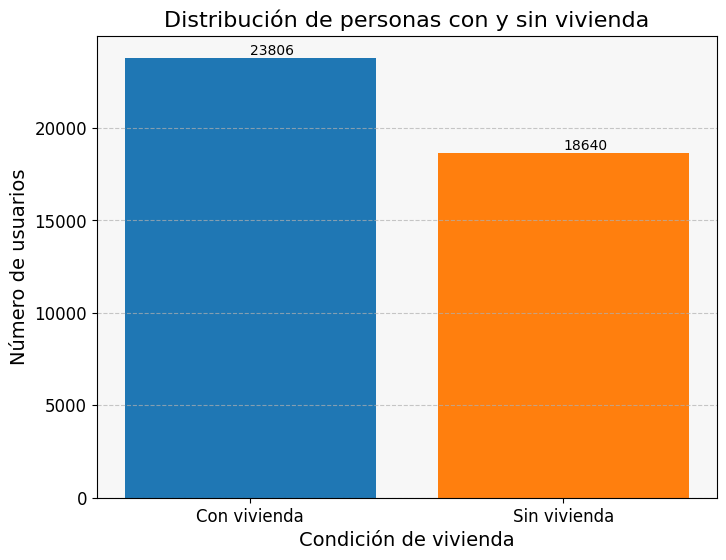

In [92]:
# Calcular el número de personas con y sin vivienda
num_persona_con_vivienda = df[df['vivienda'] == 'si'].shape[0]
num_persona_sin_vivienda = df[df['vivienda'] == 'no'].shape[0]

# Datos para el gráfico
labels = ['Con vivienda', 'Sin vivienda']
datos = [num_persona_con_vivienda, num_persona_sin_vivienda]
colors = ['#1f77b4', '#ff7f0e']  # Azul y naranja

# Crear el gráfico de barras con un estilo más bonito
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico
bars = plt.bar(labels, datos, color=colors)

# Agregar etiquetas en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), va='bottom')

plt.title('Distribución de personas con y sin vivienda', fontsize=16)
plt.xlabel('Condición de vivienda', fontsize=14)
plt.ylabel('Número de usuarios', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla para mejor visualización

# Personalizar el fondo del gráfico
plt.gca().set_facecolor('#f7f7f7')

plt.show()


5. ¿Cuantas personas con vivienda no tienen deuda?

In [77]:
usuarios_vivienda_si_deuda_no = usuarios_vivienda_si[usuarios_vivienda_si['deuda'] == "no"]
usuarios_deud_no_viv_si = len(usuarios_vivienda_si_deuda_no)
porcentaje_deud_no_viv_si = round((len(usuarios_vivienda_si_deuda_no) / len(usuarios_vivienda_si))*100,1)
print (f'Tenemos un total de "{usuarios_deud_no_viv_si}" que representa un "{porcentaje_deud_no_viv_si} %" respecto a los usuarios, que SI tienen vivienda y NO tienen deudas.')

Tenemos un total de "23399" que representa un "98.3 %" respecto a los usuarios, que SI tienen vivienda y NO tienen deudas.


#### Con esta información sacamos un perfil de usuario que ya ha acabado de pagar una vivienda y no tiene una deuda por lo que podria estar interesado en depositar sus ahorros a plazo fijo 

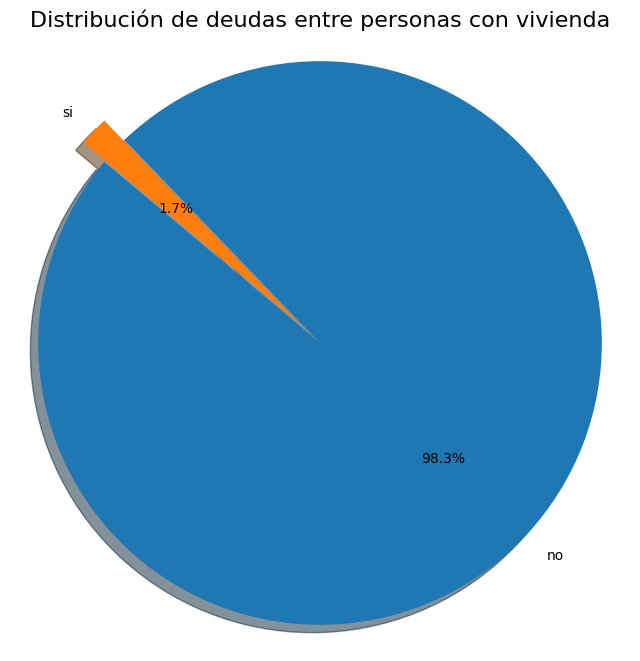

In [93]:
# Filtrar el DataFrame por personas con vivienda
df_vivienda_si = df[df['vivienda'] == 'si']

# Contar el número de personas con y sin deuda
deudas_vivienda_si = df_vivienda_si['deuda'].value_counts()

# Configuración de colores y estilos
colors = ['#1f77b4', '#ff7f0e']  # Azul y naranja
explode = (0.1, 0)  # Destacar la porción "Tiene deuda"

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))  # Ajustar el tamaño del gráfico
plt.pie(deudas_vivienda_si, labels=deudas_vivienda_si.index, autopct='%1.1f%%', colors=colors, explode=explode,
        shadow=True, startangle=140)

# Personalizar el gráfico
plt.title('Distribución de deudas entre personas con vivienda', fontsize=16)
plt.axis('equal')  # Hacer que el gráfico de torta sea un círculo

# Mostrar el gráfico
plt.show()


6. ¿Cual es la edad promedio de las personas SIN deuda y CON vivienda propia? 

In [79]:
# Filtrar personas que no tienen deuda y tienen vivienda
personas_sin_deuda_y_con_vivienda = df[(df['deuda'] == 'no') & (df['vivienda'] == 'si')]

# Calcular la edad promedio
edad_promedio = personas_sin_deuda_y_con_vivienda['edad'].mean()

print("La edad promedio de las personas que no tienen deuda y tienen vivienda es:", round(edad_promedio, 2))

La edad promedio de las personas que no tienen deuda y tienen vivienda es: 39.07


#### **Consideramos para el perfil ideal que el usuario objetivo tenga una edad que consideremos ni muy joven ni muy mayor para que sea atractivo a este usuario hacer un depósito a plazo fijo**

7. ¿Cual es la mediana de la edades de las personas SIN deuda y CON vivienda propia?

In [80]:
# Calcular la mediana de las edades
mediana_edades = round(personas_sin_deuda_y_con_vivienda['edad'].median())

print("La mediana de las edades de las personas que no tienen deuda y tienen vivienda es:", mediana_edades)

La mediana de las edades de las personas que no tienen deuda y tienen vivienda es: 37


7. ¿Cual es la media de edades de las personas según su estado civil?

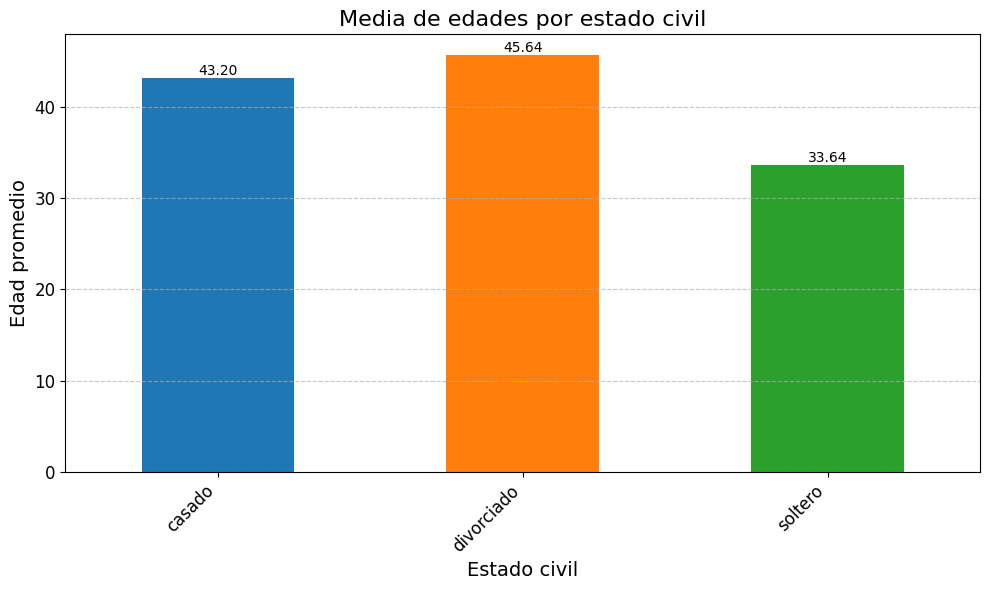

In [91]:
media_edades_por_estado_civil = df.groupby('estado_civil')['edad'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
media_edades_por_estado_civil.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Personalizar el gráfico
plt.title('Media de edades por estado civil', fontsize=16)
plt.xlabel('Estado civil', fontsize=14)
plt.ylabel('Edad promedio', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotar etiquetas para mejor visualización
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla para mejor visualización

for index, value in enumerate(media_edades_por_estado_civil):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom', fontsize=10)
# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

8. ¿Cuantas personas NO tienen deuda, SI tienen vivienda y NO tienen prestamos?

In [82]:
personas_sin_deuda_y_con_vivienda_sin_prestamo = df[(df['deuda'] == 'no') & (df['vivienda'] == 'si') & (df['prestamo'] == 'no')]

# Contar el número de personas que cumplen con las condiciones
num_personas = len(personas_sin_deuda_y_con_vivienda_sin_prestamo)

# Mostrar la cantidad de personas en un DataFrame
dataframe_personas = personas_sin_deuda_y_con_vivienda_sin_prestamo.reset_index(drop=True)  # Reiniciar el índice
print("Cantidad de personas: ", num_personas," con vivienda, sin prestamo y sin deuda.")
print("\nDataFrame con las personas:")
dataframe_personas

Cantidad de personas:  19320  con vivienda, sin prestamo y sin deuda.

DataFrame con las personas:


,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,No_Especificado,192,16-may-2021,1,-1,0,No_Especificado,no
1,3,25,student,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,No_Especificado,no
2,9,30,blue-collar,soltero,secundaria/superiores,no,3,si,no,movil,51,25-jul-2021,1,-1,0,No_Especificado,no
3,12,48,blue-collar,divorciado,secundaria/superiores,no,65,si,no,movil,146,14-may-2021,1,370,1,sin_exito,no
4,14,31,management,divorciado,universitarios,no,883,si,no,movil,112,5-mar-2021,2,106,1,sin_exito,si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19315,44247,29,services,soltero,secundaria/superiores,no,498,si,no,No_Especificado,177,3-jun-2021,26,-1,0,No_Especificado,no
19316,44249,30,blue-collar,casado,primaria,no,597,si,no,No_Especificado,190,23-may-2021,1,-1,0,No_Especificado,no
19317,44252,38,management,casado,secundaria/superiores,no,-323,si,no,No_Especificado,250,9-jun-2021,1,-1,0,No_Especificado,no
19318,44254,51,blue-collar,casado,secundaria/superiores,no,794,si,no,fijo,747,24-jul-2021,1,-1,0,No_Especificado,no


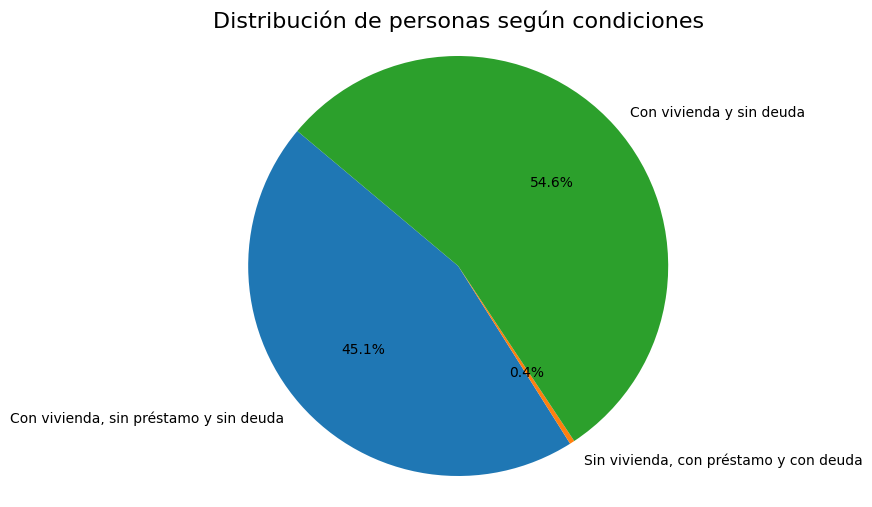

In [96]:
# Filtrar personas con vivienda, sin préstamo y sin deuda
personas_vivienda_sin_prestamo_sin_deuda = df[(df['vivienda'] == 'si') & (df['prestamo'] == 'no') & (df['deuda'] == 'no')]
num_personas_vivienda_sin_prestamo_sin_deuda = len(personas_vivienda_sin_prestamo_sin_deuda)

# Filtrar personas sin vivienda pero con préstamo y deuda
personas_sin_vivienda_con_prestamo_con_deuda = df[(df['vivienda'] == 'no') & (df['prestamo'] == 'si') & (df['deuda'] == 'si')]
num_personas_sin_vivienda_con_prestamo_con_deuda = len(personas_sin_vivienda_con_prestamo_con_deuda)

# Filtrar personas sin deuda y con vivienda
personas_con_vivienda_sin_deuda = df[(df['vivienda'] == 'si') & (df['deuda'] == 'no')]
num_personas_con_vivienda_sin_deuda = len(personas_con_vivienda_sin_deuda)

# Etiquetas y datos para el gráfico de torta
etiquetas = ['Con vivienda, sin préstamo y sin deuda', 'Sin vivienda, con préstamo y con deuda', 'Con vivienda y sin deuda']
datos = [num_personas_vivienda_sin_prestamo_sin_deuda, num_personas_sin_vivienda_con_prestamo_con_deuda, num_personas_con_vivienda_sin_deuda]
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Azul, naranja y verde

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(datos, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de personas según condiciones', fontsize=16)
plt.axis('equal')  # Aspecto circular
plt.show()


9. ¿Cuales son las personas que no tengan deuda, que si tengan vivienda,tengan prestamo y que SI sean target?
- TARGET SI

In [84]:
pdvpt = df[(df['deuda'] == 'no') & (df['vivienda'] == 'si') & (df['prestamo'] == 'no') & (df['target'] == 'si')]
pdvpt

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
13,14,31,management,divorciado,universitarios,no,883,si,no,movil,112,5-mar-2021,2,106,1,sin_exito,si
21,22,35,management,casado,universitarios,no,991,si,no,movil,1489,6-may-2021,3,-1,0,No_Especificado,si
116,117,40,student,soltero,secundaria/superiores,no,595,si,no,movil,406,3-jun-2021,2,-1,0,No_Especificado,si
117,118,32,admin.,casado,secundaria/superiores,no,684,si,no,movil,607,14-may-2021,3,-1,0,No_Especificado,si
133,134,32,technician,casado,universitarios,no,2976,si,no,movil,783,5-feb-2021,1,175,5,sin_exito,si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44122,44123,38,blue-collar,divorciado,secundaria/superiores,no,1817,si,no,movil,1096,28-jul-2021,4,-1,0,No_Especificado,si
44132,44133,36,technician,divorciado,secundaria/superiores,no,2823,si,no,movil,215,8-jun-2021,1,371,6,sin_exito,si
44133,44134,29,management,soltero,universitarios,no,983,si,no,movil,963,11-jul-2021,2,-1,0,No_Especificado,si
44156,44157,20,blue-collar,soltero,secundaria/superiores,no,423,si,no,movil,498,16-apr-2021,1,-1,0,No_Especificado,si


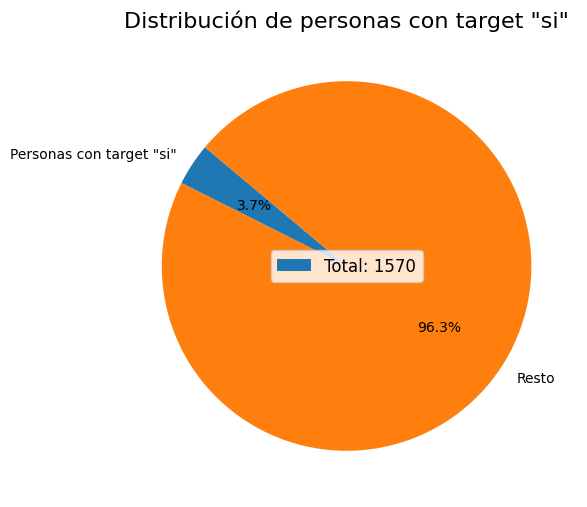

()

In [99]:
# Filtrar el DataFrame por el target 'si'
pdvpt_target_si = pdvpt[pdvpt['target'] == 'si']

# Contar el número de personas que cumplen con las condiciones y tienen target 'si'
num_personas_target_si = len(pdvpt_target_si)
num_resto = len(df) - num_personas_target_si

# Datos para el gráfico
labels = ['Personas con target "si"', 'Resto']
datos = [num_personas_target_si, num_resto]
colors = ['#1f77b4', '#ff7f0e']  # Mismos colores que antes: azul y naranja

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico
plt.pie(datos, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Añadir leyenda con el total de personas que tienen el target 'si'
plt.legend([f'Total: {num_personas_target_si}'], loc='center', fontsize=12)

plt.title('Distribución de personas con target "si"', fontsize=16)

plt.show()
()






- TARGET NO

In [85]:
pdvptno = df[(df['deuda'] == 'no') & (df['vivienda'] == 'si') & (df['prestamo'] == 'no') & (df['target'] == 'no')]
pdvptno

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,No_Especificado,192,16-may-2021,1,-1,0,No_Especificado,no
2,3,25,student,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,No_Especificado,no
8,9,30,blue-collar,soltero,secundaria/superiores,no,3,si,no,movil,51,25-jul-2021,1,-1,0,No_Especificado,no
11,12,48,blue-collar,divorciado,secundaria/superiores,no,65,si,no,movil,146,14-may-2021,1,370,1,sin_exito,no
17,18,31,management,soltero,universitarios,no,518,si,no,movil,399,18-may-2021,1,-1,0,No_Especificado,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44246,44247,29,services,soltero,secundaria/superiores,no,498,si,no,No_Especificado,177,3-jun-2021,26,-1,0,No_Especificado,no
44248,44249,30,blue-collar,casado,primaria,no,597,si,no,No_Especificado,190,23-may-2021,1,-1,0,No_Especificado,no
44251,44252,38,management,casado,secundaria/superiores,no,-323,si,no,No_Especificado,250,9-jun-2021,1,-1,0,No_Especificado,no
44253,44254,51,blue-collar,casado,secundaria/superiores,no,794,si,no,fijo,747,24-jul-2021,1,-1,0,No_Especificado,no


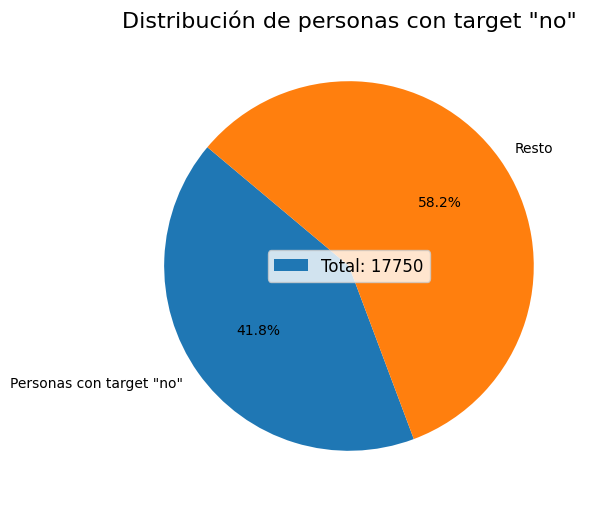

In [101]:
# Filtrar el DataFrame por el target 'no'
pdvptno = df[(df['deuda'] == 'no') & (df['vivienda'] == 'si') & (df['prestamo'] == 'no') & (df['target'] == 'no')]

# Contar el número de personas que cumplen con las condiciones y tienen target 'no'
num_personas_target_no = len(pdvptno)
num_resto = len(df) - num_personas_target_no

# Datos para el gráfico
labels = ['Personas con target "no"', 'Resto']
datos = [num_personas_target_no, num_resto]
colors = ['#1f77b4', '#ff7f0e']  # Mismos colores que antes: azul y naranja

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico
plt.pie(datos, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Añadir leyenda con el total de personas que tienen el target 'no'
plt.legend([f'Total: {num_personas_target_no}'], loc='center', fontsize=12)

plt.title('Distribución de personas con target "no"', fontsize=16)

plt.show()




In [86]:
target_no = (df['target'] == 'no')

In [87]:
# Calcular el saldo promedio de las personas que cumplen con las condiciones
saldo_promedio = personas_sin_deuda_y_con_vivienda_sin_prestamo['saldo'].mean().round(2)

print("El saldo promedio de las personas que cumplen con las condiciones es:", saldo_promedio)

El saldo promedio de las personas que cumplen con las condiciones es: 1274.28


In [88]:
# Calcular la mediana del saldo de las personas que cumplen con las condiciones
saldo_mediana = personas_sin_deuda_y_con_vivienda_sin_prestamo['saldo'].median()

print("La mediana del saldo de las personas que cumplen con las condiciones es:", saldo_mediana)


La mediana del saldo de las personas que cumplen con las condiciones es: 456.0


10. ¿Cuál es el número de personas por estado cívil con las condiciones anteriores(con vivienda, sin prestamos y sin deudas)?

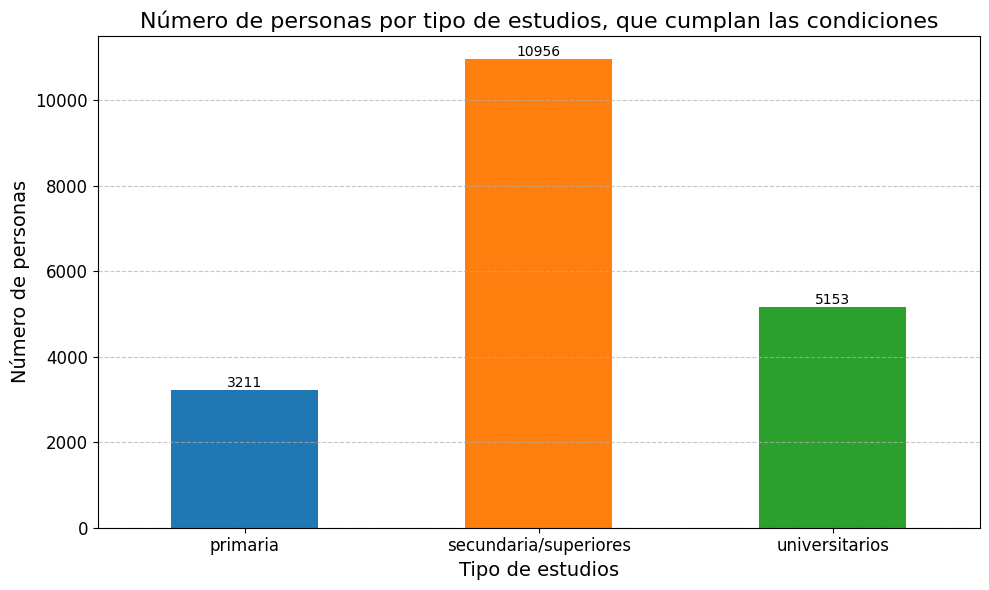

In [51]:
# Agrupar por tipo de estudios y contar el número de personas en cada categoría
personas_por_tipo_de_estudios = personas_sin_deuda_y_con_vivienda_sin_prestamo.groupby('educacion').size()

# Configuración de colores y estilo
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
personas_por_tipo_de_estudios.plot(kind='bar', color=colors)
  
# Personalizar el gráfico
plt.title('Número de personas por tipo de estudios, que cumplan las condiciones', fontsize=16)
plt.xlabel('Tipo de estudios', fontsize=14)
plt.ylabel('Número de personas', fontsize=14)
plt.xticks(rotation=0, ha='center', fontsize=12)  # Rotar etiquetas para mejor visualización
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar rejilla para mejor visualización


# Añadir el número exacto de personas en cada barra
for index, value in enumerate(personas_por_tipo_de_estudios):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
    
# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()
